In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST-data", one_hot=True)

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


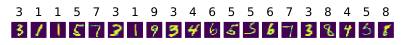

In [5]:
fig, axes = plt.subplots(1, 20, figsize=(7, 3))
for img, label, ax in zip(mnist.train.images[40000:],mnist.train.labels[40000:], axes):
    guess = np.argmax(label)
    ax.set_title(guess)
    ax.imshow(img.reshape((28, 28)))
    ax.axis('off')
plt.show()

In [6]:
sess = tf.InteractiveSession()
x  = tf.placeholder(tf.float32 , shape=[None,784])
y_ = tf.placeholder(tf.float32 , shape=[None,10])
w = tf.Variable(tf.zeros([784,10],tf.float32))
b = tf.Variable(tf.zeros([10],tf.float32))
sess.run(tf.global_variables_initializer())

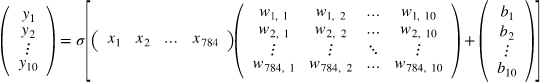

In [7]:
y = tf.nn.softmax(tf.matmul(x,w) +b)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y), reduction_indices = [1]))

In [8]:
train_step = tf.train.GradientDesce
ntOptimizer(0.5).minimize(cross_entropy)

final accuracy is  90.99000096321106
--------------------------------------------------


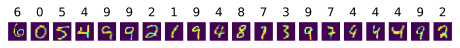

In [10]:
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    
    for i in range(1000) : 
        batch = mnist.train.next_batch(50)
        train_step.run(feed_dict={ y_: batch[1], x:batch[0] })
        
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))

    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

    acc = accuracy.eval(feed_dict={x: mnist.test.images , y_:mnist.test.labels})*100

    print('final accuracy is ' , acc)
    print('--------------------------------------------------')
    fig, axes = plt.subplots(1, 20, figsize=(8, 4))
    for img, ax in zip(mnist.test.images[100:], axes):
        guess = np.argmax(sesh.run(y, feed_dict={x: [img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape((28, 28)))
        ax.axis('off')